In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef, roc_auc_score, accuracy_score

In [50]:
svm_model = SVC()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()

execution time : 20.09442973136902
Fitness values: 4.8522827336534515
Best parameters: [ 1.11814360e-01 -3.75260061e-01 -4.61972546e-01 -1.24839555e+00
  4.04618543e-01  7.74811928e-02 -3.32239256e-01 -2.49011823e-01
  1.46697653e-01  6.13910312e-02  6.83936083e-01 -9.36870922e-01
  6.93564839e-01  1.99116413e-01  2.57745639e-01 -9.12397112e-01
 -2.19271079e-01 -1.68837488e-04  6.37508495e-02 -3.03821625e-01
  1.70078760e-01  3.68223084e-01 -4.01156589e-01  1.04024314e-01
 -2.70813481e-01 -4.10865207e-01 -2.94132392e-01  3.67311744e-01
 -6.10060133e-01  5.23715474e-01  3.70062902e-01  4.90685600e-01
  1.20866010e-01 -7.69160751e-02 -2.04691402e-01  4.15224445e-01
 -1.35284559e-01 -2.45281694e-01  4.26096479e-01  5.81206161e-02
  7.20213198e-01  4.81904863e-01 -5.35225732e-01  1.30248075e-01
 -4.04235991e-01  2.18070435e-01  1.88620703e-01  1.71839085e-01
 -1.48195418e-02  3.30644451e-01 -7.78566174e-01 -5.92033877e-01
 -2.51165176e-02 -6.14198973e-02 -3.11280060e-01 -5.62052237e-01
 -9

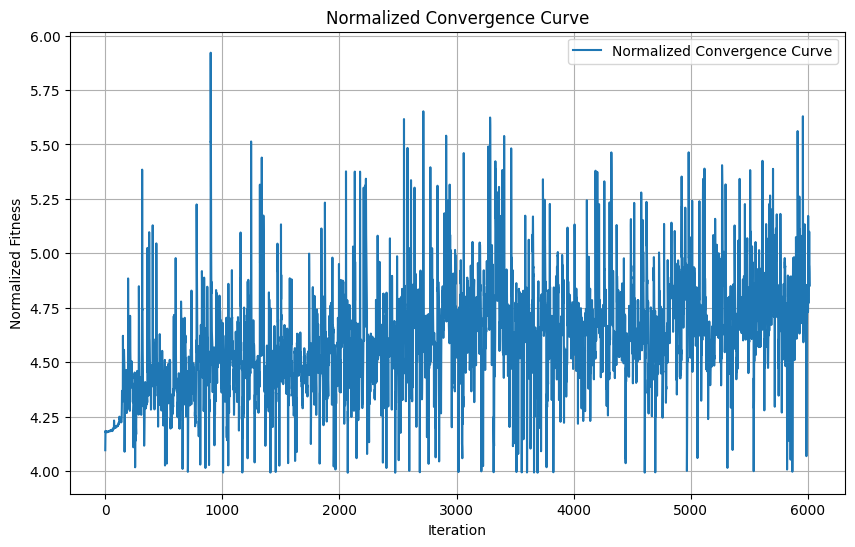

In [232]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt


np.random.seed(42)
# Lion Optimization Algorithm (LOA)
class LionOptimizationAlgorithm:
    def __init__(self, num_lions, num_features, bounds):
        self.num_lions = num_lions
        self.num_features = num_features
        self.bounds = bounds
        self.population = self.initialize_population()
        self.fitness_history = []

    def initialize_population(self):
        return np.random.uniform(low=self.bounds[0], high=self.bounds[1], size=(self.num_lions, self.num_features))

    def evaluate_fitness(self, X_train, X_test, y_train, y_test):
        fitness_values = []
        for lion in self.population:
            model = LinearRegression()
            model.fit(X_train.dot(lion.reshape(-1, 1)), y_train)
            y_pred = model.predict(X_test.dot(lion.reshape(-1, 1)))
            mse = mean_squared_error(y_test, y_pred)
            fitness_values.append(1 / mse)  # Fitness is inversely proportional to MSE
            self.fitness_history.append(np.mean(fitness_values))  # Store mean
        return np.array(fitness_values)

    def update_position(self, fitness_values):
        # Select top lions based on fitness
        sorted_indices = np.argsort(fitness_values)[::-1]
        top_lions = self.population[sorted_indices[:self.num_lions // 2]]

        # Update position of lions using mean of top lions
        self.population = np.vstack([np.mean(top_lions, axis=0)] * self.num_lions)

    def hunt_prey(self):
        # Apply individual movement (random perturbation)
        self.population += np.random.uniform(-0.1, 0.1, size=self.population.shape)

# Example usage
# Generate synthetic data
# X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
import pandas as pd
data = pd.read_csv('./imageData.csv')

# Preprocess your dataset if necessary
# For example, handle missing values, encode categorical variables, scale features, etc.

# Split the dataset into features (X) and target variable (y)
# Replace X and y with your features and target variable
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train = scaler2.fit_transform(X_train)
# X_test = scaler2.fit_transform(X_test)


# Initialize LOA
num_lions = 15
num_features = X_train.shape[1]
bounds = (-1, 1)  # Parameter bounds
loa = LionOptimizationAlgorithm(num_lions, num_features, bounds)


start_time = time.time()





# Optimization loop

num_iterations = 400
for i in range(num_iterations):
    fitness_values = loa.evaluate_fitness(X_train, X_test, y_train, y_test)
    loa.update_position(fitness_values)
    loa.hunt_prey()


execution_time = time.time() - start_time
print("execution time :",execution_time)


fitness_values = loa.evaluate_fitness(X_train, X_test, y_train, y_test)
print("Fitness values:", np.mean(fitness_values))

# Final best lion (parameters)
best_lion = loa.population[np.argmax(fitness_values)]
print("Best parameters:", best_lion)



# Extract selected features from the best lion's parameters
selected_features_indices = np.where(np.abs(best_lion) > 0.1)[0].astype(int)
selected_features = X.columns[selected_features_indices]  # Assuming X is a pandas DataFrame

# Print selected features
print("Selected features:", selected_features)
print("Selected features length : ", len(selected_features))



# Train final model with best parameters
final_model = KNeighborsClassifier()
final_model.fit(X_train.dot(best_lion.reshape(-1, 1)), y_train)

# Evaluate final model
final_predictions = final_model.predict(X_test.dot(best_lion.reshape(-1, 1)))
final_mse = mean_squared_error(y_test, final_predictions)
print("Final MSE:", final_mse)



# Extract selected features from the best lion's parameters
selected_features_indices = np.where(np.abs(best_lion) > 0.1)
selected_features = X.columns[selected_features_indices]  # Assuming X is a pandas DataFrame



# Flatten fitness history for plotting
flatten_fitness_history = np.array(loa.fitness_history).flatten()

# Plot normalized convergence curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6015 + 1), flatten_fitness_history, label='Normalized Convergence Curve')

plt.title('Normalized Convergence Curve')
plt.xlabel('Iteration')
plt.ylabel('Normalized Fitness')
plt.legend()
plt.grid(True)
plt.show()


In [230]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, roc_auc_score, accuracy_score
def accuracy_from_mse(y_true, y_pred, threshold):
    mse = mean_squared_error(y_true, y_pred)
    # Assuming threshold is some measure of how close you want the predictions to be to the true values
    correct_predictions = np.sum((y_pred - y_true) ** 2 <= threshold)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

# Example usage
threshold = 0.6 # Define your threshold
accuracy = accuracy_from_mse(y_test, final_predictions, threshold)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, np.round(final_predictions))
print("Confusion Matrix:")
print(conf_matrix)

tn, fp, fn, tp = conf_matrix.ravel()


# for special linear regression when matrix is 3*3

# tn, fp, fn, fn, tp, fp, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)


# # Calculate precision, recall, and F1-score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate Cohen's Kappa
kappa_score = cohen_kappa_score(y_test, np.round(final_predictions))

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, np.round(final_predictions))

# Calculate AUC
auc = roc_auc_score(y_test, final_predictions)

# Calculate accuracy
# accuracy = accuracy_score(y_test, final_predictions)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Kappa Score:", kappa_score)
print("Matthews Correlation Coefficient:", mcc)
print("AUC:", auc)
# print("Accuracy:", accuracy)



Accuracy: 0.7483333333333333
Confusion Matrix:
[[406 172]
 [130 492]]
Specificity: 0.7024221453287197
Sensitivity: 0.7909967845659164
Precision: 0.7409638554216867
Recall: 0.7909967845659164
F1-Score: 0.7651632970451011
Kappa Score: 0.4946903444583258
Matthews Correlation Coefficient: 0.495916415315346
AUC: 0.746709464947318


In [184]:

# Assuming final_predictions is continuous and needs to be thresholded
threshold = 0.5  # Define your threshold
binary_predictions = (final_predictions >= threshold).astype(int)  # Thresholding for binary predictions

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate other classification metrics
# Make sure to uncomment and update the metrics based on binary predictions and targets
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
kappa_score = cohen_kappa_score(y_test, binary_predictions)
mcc = matthews_corrcoef(y_test, binary_predictions)
auc = roc_auc_score(y_test, binary_predictions)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Kappa Score:", kappa_score)
print("Matthews Correlation Coefficient:", mcc)
print("AUC:", auc)


Accuracy: 0.78
Confusion Matrix:
[[431 147]
 [117 505]]
Specificity: 0.745674740484429
Sensitivity: 0.8118971061093248
Precision: 0.7745398773006135
Recall: 0.8118971061093248
F1-Score: 0.7927786499215069
Kappa Score: 0.5585973203736319
Matthews Correlation Coefficient: 0.5593013547860307
AUC: 0.7787859232968769


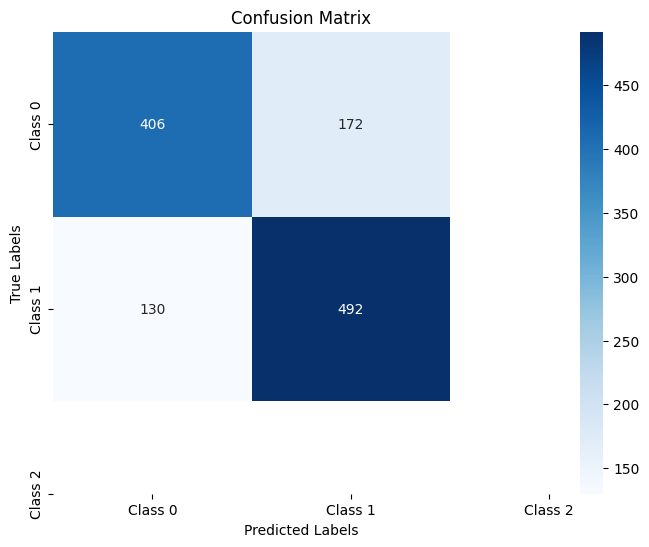

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt


labels = ['Class 0', 'Class 1', 'Class 2']  # Adjust these labels based on your classes

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

execution time : 31.186439037322998
Fitness values: 4.701230844010198
Best parameters: [-0.69726497  0.70158293 -0.17731107 -0.02485232 -0.77328908 -0.40034039
  0.05123718 -0.74455659  0.42732031  0.85971484  0.5130471  -1.2210192
  0.65214077  0.15413015  0.11886924 -1.44399056 -0.17082694  0.46756581
  0.33052667 -0.48147625 -0.20364854 -0.07765868 -0.84379686  0.13067265
  0.41361228 -0.37420719  0.29759542 -0.55829307  0.41619732  0.735931
 -0.14490728 -0.16963746 -0.38269072  0.78080725 -0.4189451   0.83607091
  0.16576437 -0.79524161 -0.23329645  0.9497415   0.54949753 -0.47931412
  0.3363346   0.55583068 -0.45935838 -0.03351766  0.18755666  0.21793284
  0.41739147 -0.13435965  0.50508499  0.30936659  0.00778668  0.3376876
  0.31248369  0.19901709 -0.34717468 -0.01489639 -0.74796007  0.58353173
  0.5640864  -0.79768822  1.32526263 -0.73795709 -0.67517771 -0.23253186
  0.40190163  0.91436147 -0.51646436  0.70710373 -0.48411385 -0.26752285
  0.51458274]
Selected features: Index(['

c:\Users\techie_sish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


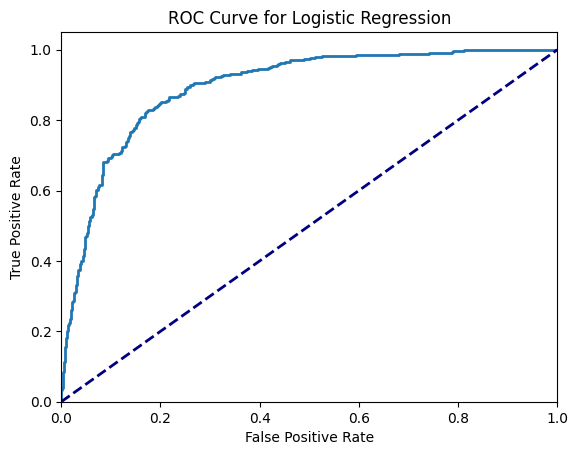

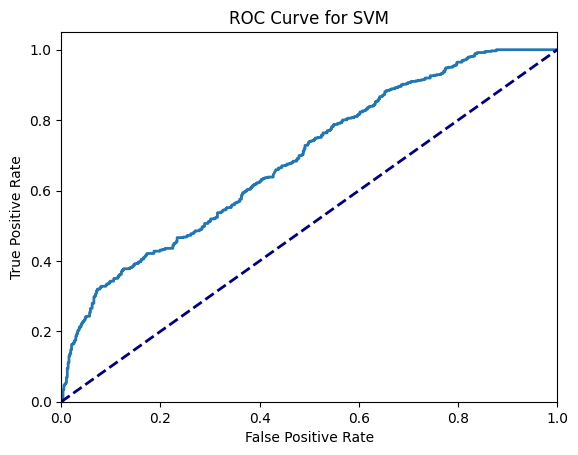

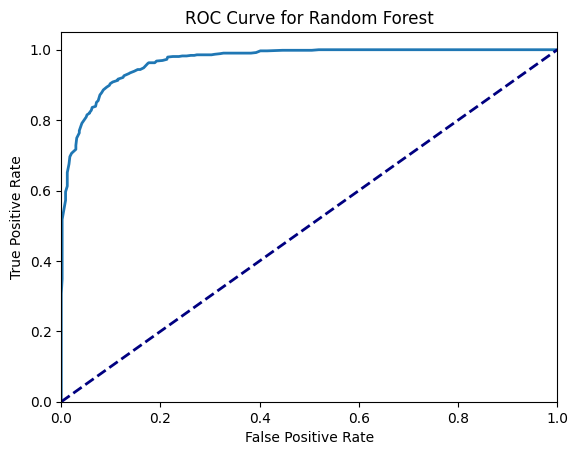

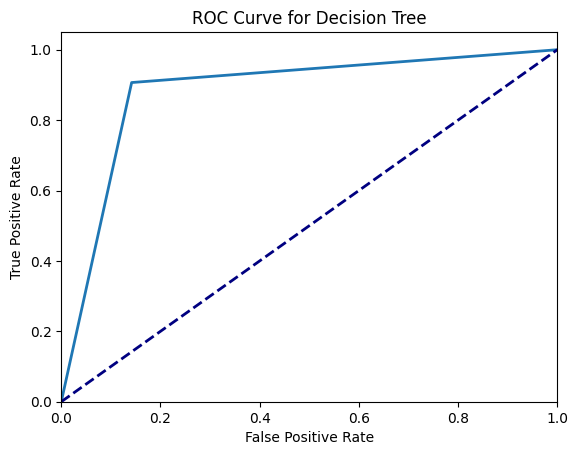

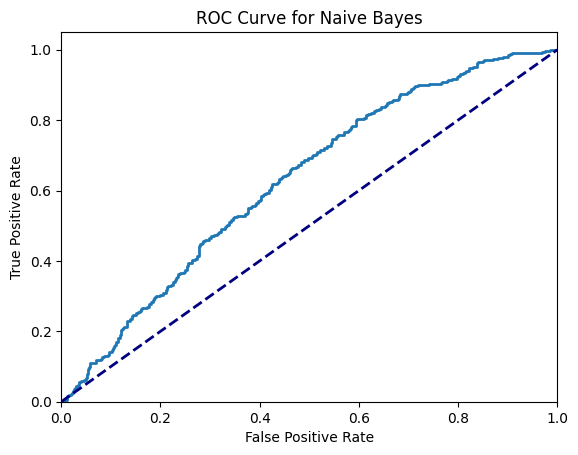

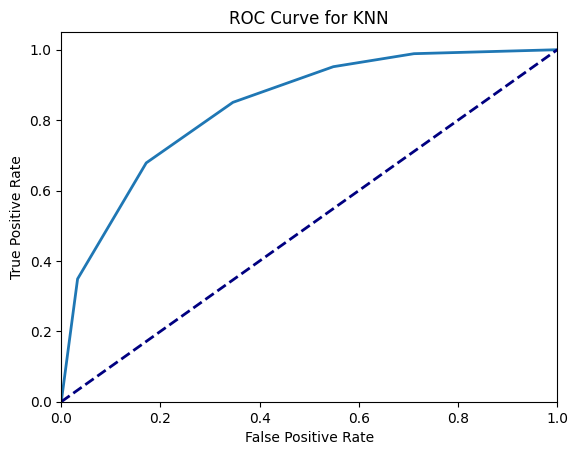

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Lion Optimization Algorithm (LOA)
class LionOptimizationAlgorithm:
    def __init__(self, num_lions, num_features, bounds):
        self.num_lions = num_lions
        self.num_features = num_features
        self.bounds = bounds
        self.population = self.initialize_population()
        self.fitness_history = []

    def initialize_population(self):
        return np.random.uniform(low=self.bounds[0], high=self.bounds[1], size=(self.num_lions, self.num_features))

    def evaluate_fitness(self, X_train, X_test, y_train, y_test):
        fitness_values = []
        for lion in self.population:
            model = LinearRegression()
            model.fit(X_train.dot(lion.reshape(-1, 1)), y_train)
            y_pred = model.predict(X_test.dot(lion.reshape(-1, 1)))
            mse = mean_squared_error(y_test, y_pred)
            fitness_values.append(1 / mse)  # Fitness is inversely proportional to MSE
            self.fitness_history.append(np.mean(fitness_values))  # Store mean
        return np.array(fitness_values)

    def update_position(self, fitness_values):
        # Select top lions based on fitness
        sorted_indices = np.argsort(fitness_values)[::-1]
        top_lions = self.population[sorted_indices[:self.num_lions // 2]]

        # Update position of lions using mean of top lions
        self.population = np.vstack([np.mean(top_lions, axis=0)] * self.num_lions)

    def hunt_prey(self):
        # Apply individual movement (random perturbation)
        self.population += np.random.uniform(-0.1, 0.1, size=self.population.shape)

    def train_and_evaluate_classifiers(self, X_train, X_test, y_train, y_test, selected_features):
        classifiers = {
            "Logistic Regression": LogisticRegression(),
            "SVM": SVC(probability=True),
            "Random Forest": RandomForestClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Naive Bayes": GaussianNB(),
            "KNN": KNeighborsClassifier()
        }

        for name, classifier in classifiers.items():
            # Train classifier with selected features
            classifier.fit(X_train[selected_features], y_train)

            # Make predictions on test set
            if hasattr(classifier, "predict_proba"):
                y_pred_proba = classifier.predict_proba(X_test[selected_features])[:, 1]
            else:
                # For classifiers without predict_proba method, use decision_function or predict directly
                y_pred_proba = classifier.decision_function(X_test[selected_features])

            # Compute ROC curve and ROC area for each class
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.figure()
            plt.plot(fpr, tpr, lw=2)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve for ' + name)
            plt.show()


# Example usage
# Load data
data = pd.read_csv('./imageData.csv')

# Preprocess your dataset if necessary
# For example, handle missing values, encode categorical variables, scale features, etc.

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize LOA
num_lions = 15
num_features = X_train.shape[1]
bounds = (-1, 1)  # Parameter bounds
loa = LionOptimizationAlgorithm(num_lions, num_features, bounds)

start_time = time.time()

# Optimization loop
num_iterations = 400
for i in range(num_iterations):
    fitness_values = loa.evaluate_fitness(X_train, X_test, y_train, y_test)
    loa.update_position(fitness_values)
    loa.hunt_prey()

execution_time = time.time() - start_time
print("execution time :",execution_time)

fitness_values = loa.evaluate_fitness(X_train, X_test, y_train, y_test)
print("Fitness values:", np.mean(fitness_values))

# Final best lion (parameters)
best_lion = loa.population[np.argmax(fitness_values)]
print("Best parameters:", best_lion)

# Extract selected features from the best lion's parameters
selected_features_indices = np.where(np.abs(best_lion) > 0.1)[0].astype(int)
selected_features = X.columns[selected_features_indices]  # Assuming X is a pandas DataFrame

# Print selected features
print("Selected features:", selected_features)
print("Selected features length : ", len(selected_features))

# Train and evaluate classifiers
loa.train_and_evaluate_classifiers(X_train, X_test, y_train, y_test, selected_features)


execution time : 26.58780026435852
Fitness values: 4.747938803714342
Best parameters: [-7.23569420e-01  5.12892812e-01  6.67774247e-02  4.62450140e-01
  5.34923824e-01 -1.29570534e+00 -3.66901717e-02 -3.18305972e-01
  8.79711546e-01  7.21039379e-01 -3.55659090e-01 -5.73889436e-01
 -4.15063842e-01  8.54303273e-02  1.14735051e+00 -1.46872836e+00
 -3.35208070e-01  3.32471010e-01  2.45214141e-01  8.68893972e-02
  2.99533011e-01  1.16115591e-01  8.63449709e-02 -4.87273473e-01
  1.96128977e-01  6.76017105e-01  6.30663766e-02  8.61617899e-01
 -7.88835017e-02 -1.27501972e+00 -5.84734043e-01 -6.22380169e-01
  3.19023478e-02 -5.33729969e-02 -3.69641399e-04  1.72599406e-01
  4.95201378e-01  1.75682523e-01  4.88529679e-01 -6.10137587e-01
  5.30337961e-02  5.19487021e-02  7.04872759e-01 -2.87470964e-01
 -3.27563015e-02  2.63488963e-01 -3.27183328e-02 -2.32503094e-01
 -2.45410400e-01 -3.53051059e-01 -2.10076113e-01 -2.21471913e-01
 -5.44961883e-01  8.86286191e-01  5.98108567e-02  4.66001082e-01
 -2.

c:\Users\techie_sish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


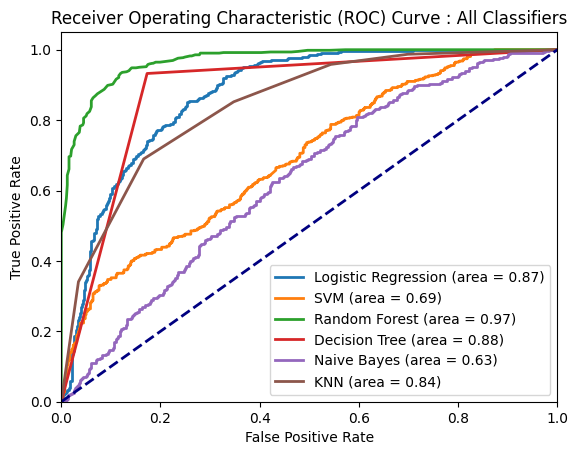

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Lion Optimization Algorithm (LOA)
class LionOptimizationAlgorithm:
    def __init__(self, num_lions, num_features, bounds):
        self.num_lions = num_lions
        self.num_features = num_features
        self.bounds = bounds
        self.population = self.initialize_population()
        self.fitness_history = []

    def initialize_population(self):
        return np.random.uniform(low=self.bounds[0], high=self.bounds[1], size=(self.num_lions, self.num_features))

    def evaluate_fitness(self, X_train, X_test, y_train, y_test):
        fitness_values = []
        for lion in self.population:
            model = LinearRegression()
            model.fit(X_train.dot(lion.reshape(-1, 1)), y_train)
            y_pred = model.predict(X_test.dot(lion.reshape(-1, 1)))
            mse = mean_squared_error(y_test, y_pred)
            fitness_values.append(1 / mse)  # Fitness is inversely proportional to MSE
            self.fitness_history.append(np.mean(fitness_values))  # Store mean
        return np.array(fitness_values)

    def update_position(self, fitness_values):
        # Select top lions based on fitness
        sorted_indices = np.argsort(fitness_values)[::-1]
        top_lions = self.population[sorted_indices[:self.num_lions // 2]]

        # Update position of lions using mean of top lions
        self.population = np.vstack([np.mean(top_lions, axis=0)] * self.num_lions)

    def hunt_prey(self):
        # Apply individual movement (random perturbation)
        self.population += np.random.uniform(-0.1, 0.1, size=self.population.shape)

    def train_and_evaluate_classifiers(self, X_train, X_test, y_train, y_test, selected_features):
        classifiers = {
            "Logistic Regression": LogisticRegression(),
            "SVM": SVC(probability=True),
            "Random Forest": RandomForestClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Naive Bayes": GaussianNB(),
            "KNN": KNeighborsClassifier()
        }

        for name, classifier in classifiers.items():
            # Train classifier with selected features
            classifier.fit(X_train[selected_features], y_train)

            # Make predictions on test set
            if hasattr(classifier, "predict_proba"):
                y_pred_proba = classifier.predict_proba(X_test[selected_features])[:, 1]
            else:
                # For classifiers without predict_proba method, use decision_function or predict directly
                y_pred_proba = classifier.decision_function(X_test[selected_features])

            # Compute ROC curve and ROC area for each class
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (name, roc_auc))

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve : All Classifiers')
        plt.legend(loc="lower right")
        plt.show()


# Example usage
# Load data
data = pd.read_csv('./imageData.csv')

# Preprocess your dataset if necessary
# For example, handle missing values, encode categorical variables, scale features, etc.

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize LOA
num_lions = 15
num_features = X_train.shape[1]
bounds = (-1, 1)  # Parameter bounds
loa = LionOptimizationAlgorithm(num_lions, num_features, bounds)

start_time = time.time()

# Optimization loop
num_iterations = 500
for i in range(num_iterations):
    fitness_values = loa.evaluate_fitness(X_train, X_test, y_train, y_test)
    loa.update_position(fitness_values)
    loa.hunt_prey()

execution_time = time.time() - start_time
print("execution time :",execution_time)

fitness_values = loa.evaluate_fitness(X_train, X_test, y_train, y_test)
print("Fitness values:", np.mean(fitness_values))

# Final best lion (parameters)
best_lion = loa.population[np.argmax(fitness_values)]
print("Best parameters:", best_lion)

# Extract selected features from the best lion's parameters
selected_features_indices = np.where(np.abs(best_lion) > 0.1)[0].astype(int)
selected_features = X.columns[selected_features_indices]  # Assuming X is a pandas DataFrame

# Print selected features
print("Selected features:", selected_features)
print("Selected features length : ", len(selected_features))

# Train and evaluate classifiers
loa.train_and_evaluate_classifiers(X_train, X_test, y_train, y_test, selected_features)
